## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [3]:
!pip install geopandas

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\steve\anaconda3\envs\learn-env\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\steve\\AppData\\Local\\Temp\\pip-install-2qkjuzjs\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\steve\\AppData\\Local\\Temp\\pip-install-2qkjuzjs\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\steve\AppData\Local\Temp\pip-pip-egg-info-0wthc8gu'
         cwd: C:\Users\steve\AppData\Local\Temp\pip-install-2qkjuzjs\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for f


  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Shapely-1.8.0-cp38-cp38-win_amd64.whl (1.1 MB)
  Using cached pyproj-3.2.1-cp38-cp38-win_amd64.whl (6.2 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)


In [6]:
#import geopandas as gpd
import folium 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [7]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())
    print("\n")

---- date ---
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
7/27/2014      1
5/17/2014      1
11/2/2014      1
8/3/2014       1
1/17/2015      1
Name: date, Length: 372, dtype: int64


---- price ---
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


---- bedrooms ---
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


---- bathrooms ---
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
#Finding which row contains the 33 bedroom home
#Given the square footage it is safe to assume that this is a typo
df.loc[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [13]:
#Fixing the typo and checking to make sure the 33 is now gone
df.loc[df['bedrooms'] ==  33] = 3
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [14]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315971,0.525795,0.701965,0.089899,0.256571,0.605443,0.053251,0.129612,0.005706,0.136556,-0.006281,0.585321,0.082876
bedrooms,0.315971,1.000000,0.527830,0.593149,0.033609,0.183620,0.492529,0.147415,0.019433,-0.009886,-0.002273,0.019492,0.404507,0.031901
bathrooms,0.525795,0.527830,1.000000,0.755522,0.088346,0.502617,0.686455,0.458214,0.051029,-0.024166,0.002983,0.044364,0.569596,0.088269
sqft_living,0.701965,0.593149,0.755522,1.000000,0.173466,0.353543,0.876476,0.295830,0.055672,-0.000622,0.035685,0.024110,0.756467,0.184363
sqft_lot,0.089899,0.033609,0.088346,0.173466,1.000000,-0.004870,0.184150,0.049198,0.004515,-0.007885,-0.033280,0.035068,0.144776,0.718205
floors,0.256571,0.183620,0.502617,0.353543,-0.004870,1.000000,0.523541,0.437149,0.003492,-0.023680,0.003210,0.039244,0.279594,-0.010793
sqft_above,0.605443,0.492529,0.686455,0.876476,0.184150,0.523541,1.000000,0.391863,0.022148,-0.006273,0.012868,0.041702,0.731824,0.195094
yr_built,0.053251,0.147415,0.458214,0.295830,0.049198,0.437149,0.391863,1.000000,-0.200507,0.388234,0.321194,-0.348480,0.305063,0.065711
yr_renovated,0.129612,0.019433,0.051029,0.055672,0.004515,0.003492,0.022148,-0.200507,1.000000,0.006572,0.013705,-0.012196,-0.000226,0.003854
zipcode,0.005706,-0.009886,-0.024166,-0.000622,-0.007885,-0.023680,-0.006273,0.388234,0.006572,1.000000,0.915496,-0.990826,-0.002687,-0.008600


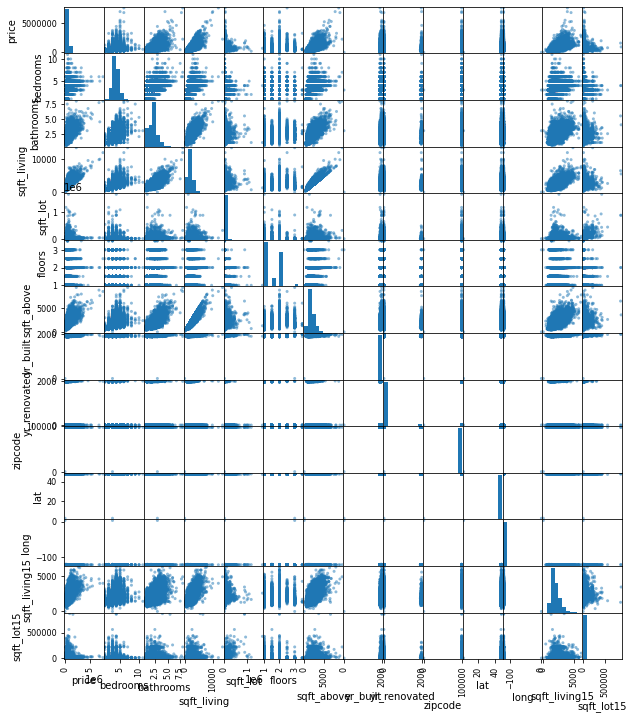

In [22]:
pd.plotting.scatter_matrix(df, figsize=(10,12));